In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 
import os

In [2]:
os.chdir(r"D:\March 2024\PML\Datasets")

In [3]:
nutri = pd.read_csv("nutrient.csv", index_col=0)

- The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.
- Random partitioning produces noticeably shorter paths for anomalies. 
- Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

- contamination‘auto’ or float, default=’auto’
- The amount of contamination of the data set, i.e. the proportion of outliers in the data set. 
- Used when fitting to define the threshold on the scores of the samples.
- If ‘auto’, the threshold is determined as in the original paper.
- If float, the contamination should be in the range (0, 0.5].

In [4]:
clf = IsolationForest(contamination=0.05, random_state=24)
clf.fit(nutri)
predictions = clf.predict(nutri)

In [5]:
print("%age of outliers="+ str((predictions<0).mean()*100)+ "%")
abn_ind = np.where(predictions < 0)
print("Outliers:")
print(nutri.index[abn_ind])

%age of outliers=7.4074074074074066%
Outliers:
Index(['BEEF ROAST', 'CLAMS CANNED'], dtype='object', name='Food_Item')


In [6]:
scaler = StandardScaler()
scaled_nutri = scaler.fit_transform(nutri)
prcomp = PCA()
scores = prcomp.fit_transform(scaled_nutri)

In [7]:
print(np.cumsum(prcomp.explained_variance_ratio_))

[0.43926469 0.66844264 0.83798533 0.99967967 1.        ]


In [8]:
obs = np.where(predictions == -1, "Inlier", "Outlier")
PCs = pd.DataFrame({'PC1':scores[:,0], 'PC2':scores[:,1],
                    'Class':obs})

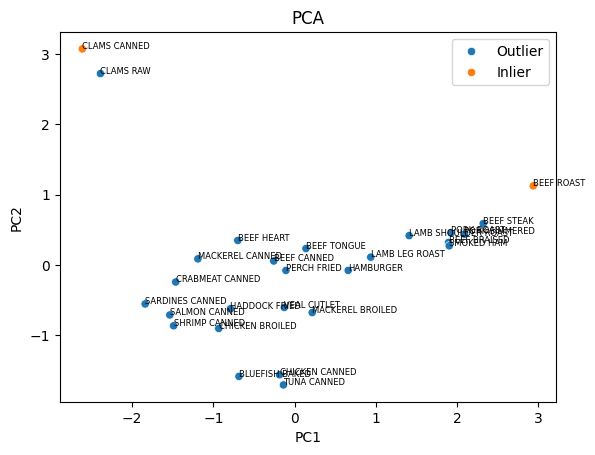

In [9]:
sns.scatterplot(data=PCs, x='PC1', y='PC2', hue='Class')

for i in np.arange(0, nutri.shape[0] ):
    plt.text(scores[i,0], scores[i,1], 
             list(nutri.index)[i], fontsize=6)
    
plt.legend(loc='best')
plt.title("PCA")
plt.show()